<a href="https://colab.research.google.com/github/jithesh9539/Connected_Deep_Networks/blob/main/e2)Tensorflow_with_builtin_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf

In [8]:
n = 200
input_dim = 3
output_dim = 2

x = tf.Variable(tf.random.uniform(shape=(n, input_dim)))
weights_true = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
bias_true = tf.Variable(tf.zeros(shape=(output_dim,)))

y = tf.matmul(tf.pow(x,2), weights_true) + tf.matmul(x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


**Defining Model and Loss**

In [9]:
def predictions(x, weights, bias):
    return tf.matmul(tf.pow(x,2), weights) + tf.matmul(x, weights) + bias

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

input_dim = 3
output_dim = 2

w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

learning_rate = 1e-3

In [10]:
def train_on_batch(x, y, w, b):
  with tf.GradientTape() as tape:
    predict = predictions(x, w, b)
    loss = compute_loss(y, predict)
    # tape.gradient works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return predict, loss

# Shuffle the data
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(5000):
  for step, (x, y) in enumerate(dataset):
    y_pred, loss = train_on_batch(x, y, w, b)
  if epoch % 500 ==0:
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5576
Epoch 500: last batch loss = 0.2237
Epoch 1000: last batch loss = 0.1538
Epoch 1500: last batch loss = 0.1103
Epoch 2000: last batch loss = 0.0794
Epoch 2500: last batch loss = 0.0572
Epoch 3000: last batch loss = 0.0413
Epoch 3500: last batch loss = 0.0299
Epoch 4000: last batch loss = 0.0217
Epoch 4500: last batch loss = 0.0158


In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE plot for y_true and y_pred distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

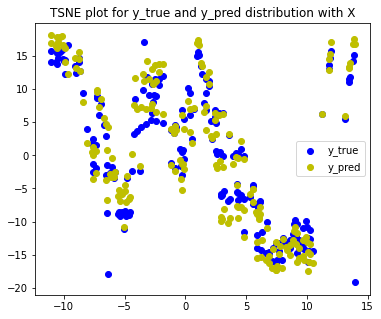

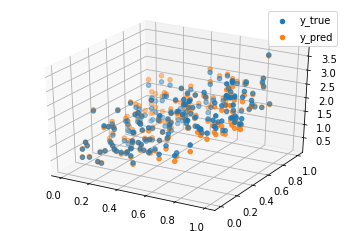

In [12]:
plot(x, y, y_pred)
plot_3d(x, y[:, 0], y_pred=y_pred[:, 0])